# DATA COLLECTION

## **From GitHub:**  It is the easiest way to upload a CSV file in Colab. For this go to the dataset in your GitHub repository, and then click on “View Raw”. Copy the link to the raw dataset and pass it as a parameter to the read_csv() in pandas to get the dataframe. 

## Libraries

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
#split the dataset
from sklearn.model_selection import train_test_split
# Deep learning
import tensorflow as tf

In [3]:
# Reding the dataset
url = 'https://raw.githubusercontent.com/puldavid87/emotion_recognition/main/emg_data.csv'
data = pd.read_csv(url)
print(data)


        EMG1   EMG2   EMG3
0      139.0  113.0  108.0
1      140.0  114.0  108.0
2      142.0  112.0  107.0
3      143.0  116.0  111.0
4      142.0  115.0  114.0
...      ...    ...    ...
29995  119.0  134.0  234.0
29996  114.0  129.0  223.0
29997  117.0  132.0  226.0
29998  115.0  127.0  211.0
29999  113.0  123.0  216.0

[30000 rows x 3 columns]


## Fuction's normalization

In [5]:
def scaler (X):
  out = []
  min=X.min()
  max=X.max()
  out=(X-min)/(max-min)
  return out

## Divide the dataset in labels' array

Each datasample has 100 points of each EMG signal, then the signal is smoothed by gaussian filter

In [6]:
X=[]

aux = []
sum = 0
for i in range(300):
  EMG1 = gaussian_filter(np.array(data.iloc[0+sum:100+sum,0]), sigma=5)
  EMG2 = gaussian_filter(np.array(data.iloc[0+sum:100+sum,1]),sigma=5)
  EMG3 = gaussian_filter(np.array(data.iloc[0+sum:100+sum,2]),sigma=5)  
  sum+=100
  for j in range(100):
    var = [EMG1[j],EMG2[j],EMG3[j]]
    var = np.array(var)
    aux.append(var)
  X.append(aux)
  aux = []
X = np.array(X)
X = scaler (X) 
print(X.shape)

y = []

for i in range(6):
  for j in range(50):
    y.append(i)
y=np.array(y)
print(y.shape)

(300, 100, 3)
(300,)


## Check samples of each label

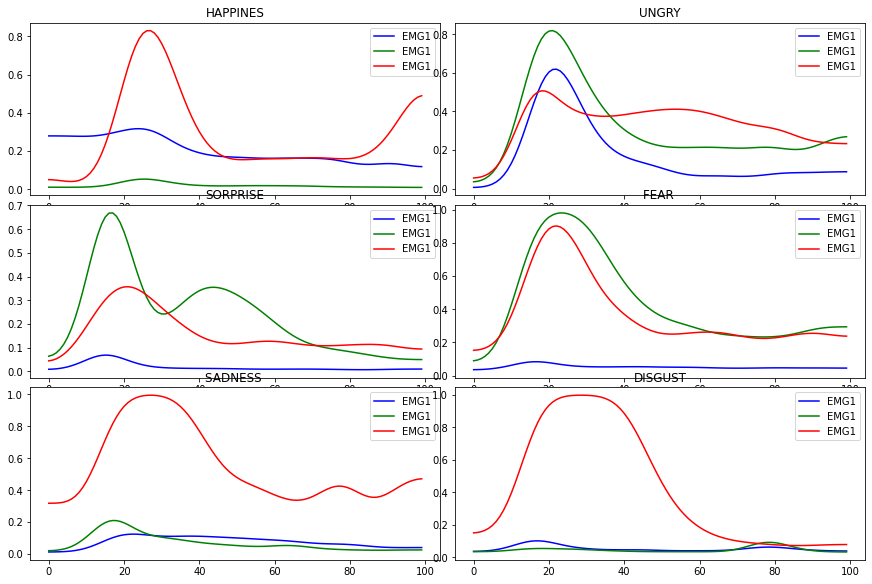

In [7]:

samples = [X[1,:,:],X[51,:,:],X[101,:,:],X[151,:,:],X[201,:,:],X[251,:,:]]
samples=np.array(samples)
fig, axs = plt.subplots(3, 2, figsize=(12, 8), constrained_layout=True)
ax1 = plt.subplot(321)
ax1.plot(samples[0,:,0],  'b', label='EMG1')
ax1.plot(samples[0,:,1],  'g', label='EMG1')
ax1.plot(samples[0,:,2],  'r', label='EMG1')
ax1.set_title("HAPPINES")
ax1.legend(loc="best")

ax2 = plt.subplot(322)
ax2.plot(samples[1,:,0],  'b', label='EMG1')
ax2.plot(samples[1,:,1],  'g', label='EMG1')
ax2.plot(samples[1,:,2],  'r', label='EMG1')
ax2.set_title("UNGRY")
ax2.legend(loc="best")

ax3 = plt.subplot(323)
ax3.plot(samples[2,:,0],  'b', label='EMG1')
ax3.plot(samples[2,:,1],  'g', label='EMG1')
ax3.plot(samples[2,:,2],  'r', label='EMG1')
ax3.set_title("SORPRISE")
ax3.legend(loc="best")

ax4 = plt.subplot(324)
ax4.plot(samples[3,:,0],  'b', label='EMG1')
ax4.plot(samples[3,:,1],  'g', label='EMG1')
ax4.plot(samples[3,:,2],  'r', label='EMG1')
ax4.set_title("FEAR ")
ax4.legend(loc="best")

ax5 = plt.subplot(325)
ax5.plot(samples[4,:,0],  'b', label='EMG1')
ax5.plot(samples[4,:,1],  'g', label='EMG1')
ax5.plot(samples[4,:,2],  'r', label='EMG1')
ax5.set_title("SADNESS ")
ax5.legend(loc="best")

ax6 = plt.subplot(326)
ax6.plot(samples[5,:,0],  'b', label='EMG1')
ax6.plot(samples[5,:,1],  'g', label='EMG1')
ax6.plot(samples[5,:,2],  'r', label='EMG1')
ax6.set_title("DISGUST")
ax6.legend(loc="best")
plt.show()

## plot several samples of each label

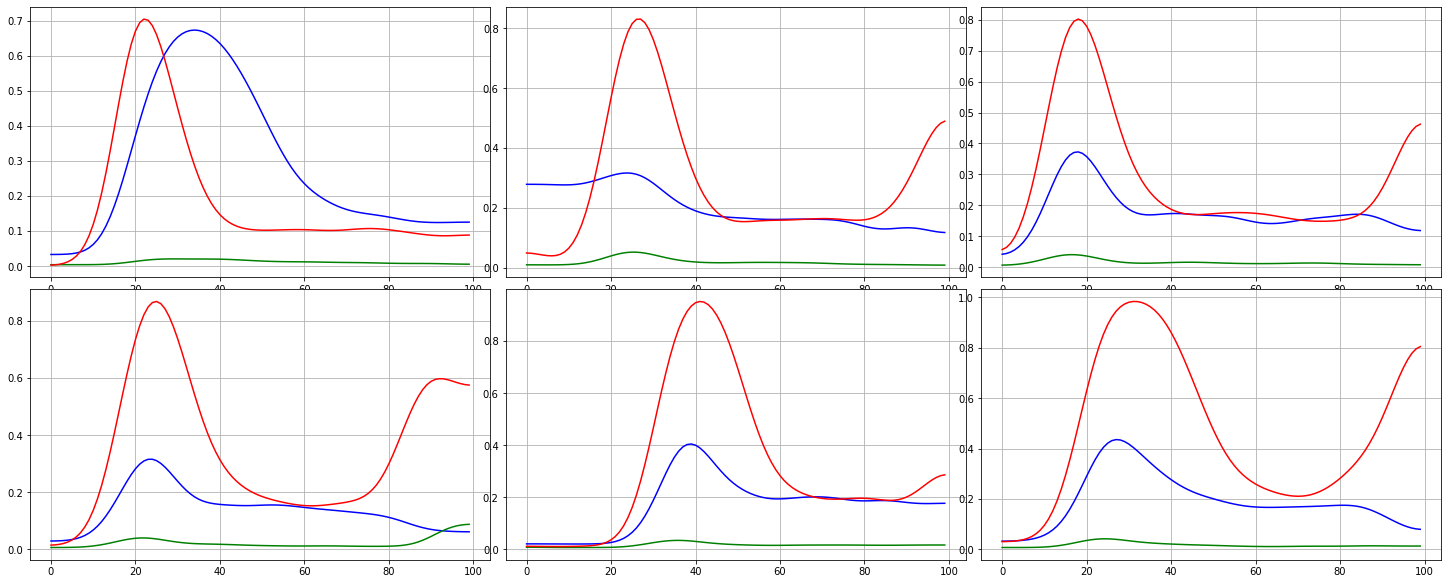

In [8]:
samples=X[0:6,:,:]
fig, axs = plt.subplots(3, 2, figsize=(20, 8), constrained_layout=True)
ax1 = plt.subplot(231)
ax1.plot(samples[0,:,0],  'b', label='EMG1')
ax1.plot(samples[0,:,1],  'g', label='EMG1')
ax1.plot(samples[0,:,2],  'r', label='EMG1')
ax1.grid(True)

ax2 = plt.subplot(232)
ax2.plot(samples[1,:,0],  'b', label='EMG1')
ax2.plot(samples[1,:,1],  'g', label='EMG1')
ax2.plot(samples[1,:,2],  'r', label='EMG1')
ax2.grid(True)

ax3 = plt.subplot(233)
ax3.plot(samples[2,:,0],  'b', label='EMG1')
ax3.plot(samples[2,:,1],  'g', label='EMG1')
ax3.plot(samples[2,:,2],  'r', label='EMG1')
ax3.grid(True)

ax4 = plt.subplot(234)
ax4.plot(samples[3,:,0],  'b', label='EMG1')
ax4.plot(samples[3,:,1],  'g', label='EMG1')
ax4.plot(samples[3,:,2],  'r', label='EMG1')
ax4.grid(True)

ax5 = plt.subplot(235)
ax5.plot(samples[4,:,0],  'b', label='EMG1')
ax5.plot(samples[4,:,1],  'g', label='EMG1')
ax5.plot(samples[4,:,2],  'r', label='EMG1')
ax5.grid(True)

ax6 = plt.subplot(236)
ax6.plot(samples[5,:,0],  'b', label='EMG1')
ax6.plot(samples[5,:,1],  'g', label='EMG1')
ax6.plot(samples[5,:,2],  'r', label='EMG1')
ax6.grid(True)
plt.show()
  

# Approach 1: Classification models

In [9]:
###### SVM ################
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

## Converting the data into a one dimensional array


In [10]:
X_con = [np.concatenate(i) for i in X]
X_con = np.array(X_con)
X_con.shape

(300, 300)

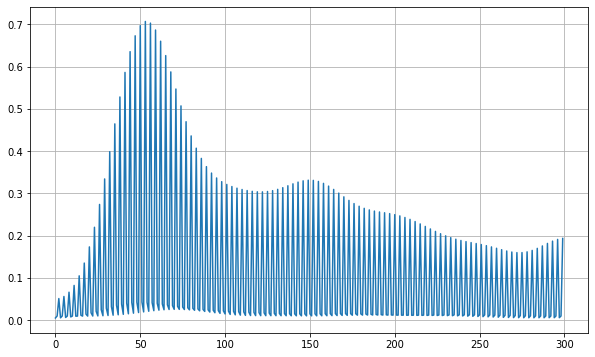

In [11]:
plt.figure(figsize=(10,6))
plt.plot(X_con[269,:])
plt.grid(True)
plt.show()


##  split the data in train and test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size = 0.20, random_state=100)
X_train=np.array(X_train)
X_train.shape

(240, 300)

## SVM

In [13]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test,y_pred, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test,y_pred, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test,y_pred, average="weighted")))
print("Error: {}%".format(metrics.mean_absolute_error(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       0.93      0.93      0.93        14
           4       0.86      0.86      0.86        14
           5       0.83      0.83      0.83         6

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.93      0.93      0.93        60

[[10  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 13  1  0]
 [ 0  0  0  1 12  1]
 [ 0  0  0  0  1  5]]

Precision: 93.33333333333333%
Recall: 93.33333333333333%
f1_score: 93.33333333333333%
Error: 0.06666666666666667%


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test,y_pred, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test,y_pred, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test,y_pred, average="weighted")))
print("Error: {}%".format(metrics.mean_absolute_error(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      0.91      0.95        11
           3       0.93      1.00      0.97        14
           4       1.00      0.93      0.96        14
           5       0.86      1.00      0.92         6

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[10  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 10  0  0  1]
 [ 0  0  0 14  0  0]
 [ 0  0  0  1 13  0]
 [ 0  0  0  0  0  6]]

Precision: 97.015873015873%
Recall: 96.66666666666667%
f1_score: 96.68895812573973%
Error: 0.06666666666666667%


## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test,y_pred, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test,y_pred, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test,y_pred, average="weighted")))
print("Error: {}%".format(metrics.mean_absolute_error(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93        14
           4       1.00      0.79      0.88        14
           5       0.86      1.00      0.92         6

    accuracy                           0.95        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.96      0.95      0.95        60

[[10  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  2 11  1]
 [ 0  0  0  0  0  6]]

Precision: 95.6547619047619%
Recall: 95.0%
f1_score: 94.87521367521367%
Error: 0.05%


## Neural network

In [23]:
y = []
for i in range(6):
  for j in range(50):
    y.append(i)
y=np.array(y)
y.shape
y=tf.keras.utils.to_categorical(y,6)
print(y)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_con,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
X_train = X_train.reshape(270,300,1)
X_test = X_test.reshape(30,300,1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(270, 300) (270, 6)
(30, 300) (30, 6)
(270, 300, 1) (270, 6)
(30, 300, 1) (30, 6)


### Architecture

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

nn = Sequential()
nn.add(Dense(units = 100, activation="relu", input_shape = (300,), name='Input'))
nn.add(Dense(units = 50, activation="relu", name='layer1'))
nn.add(Dense(units = 25, activation="relu" , name='layer2'))
nn.add(Dense(units = 6, activation='softmax',name='output'))
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 100)               30100     
                                                                 
 layer1 (Dense)              (None, 50)                5050      
                                                                 
 layer2 (Dense)              (None, 25)                1275      
                                                                 
 output (Dense)              (None, 6)                 156       
                                                                 
Total params: 36,581
Trainable params: 36,581
Non-trainable params: 0
_________________________________________________________________


In [26]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history=nn.fit(X_train, Y_train, epochs = 20, validation_data=(X_test, Y_test), batch_size = 10)

Epoch 1/20
27/27 [==============================] - 1s 10ms/step - loss: 1.5394 - accuracy: 0.3593 - val_loss: 1.2465 - val_accuracy: 0.5667
Epoch 2/20
27/27 [==============================] - 0s 4ms/step - loss: 1.0625 - accuracy: 0.6296 - val_loss: 0.8750 - val_accuracy: 0.6000
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.7222 - val_loss: 0.7483 - val_accuracy: 0.6333
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.7407 - val_loss: 0.6477 - val_accuracy: 0.7000
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7630 - val_loss: 0.6194 - val_accuracy: 0.8000
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8852 - val_loss: 0.5018 - val_accuracy: 0.8333
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.9074 - val_loss: 0.4717 - val_accuracy: 0.8667
Epoch 8/20
27/27 [=

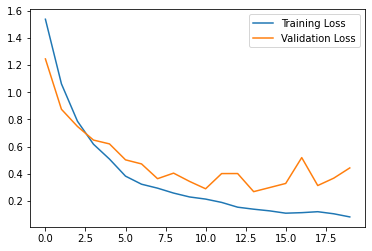

In [28]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [29]:
y_pred = nn.predict(X_test)
y_pred = (y_pred > 0.5)
index=np.argmax(y_pred)
index
from sklearn import metrics
print("")
print("Precision: {}%".format(100*metrics.precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("Error: {}%".format(metrics.mean_absolute_error(Y_test.argmax(axis=1),y_pred.argmax(axis=1))))
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
report=classification_report(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print('\Report\n')
print(report)


Precision: 88.0%
Recall: 86.66666666666667%
f1_score: 86.28167641325535%
Error: 0.2%
\Report

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       0.83      0.83      0.83         6
           4       0.80      0.89      0.84         9
           5       1.00      0.60      0.75         5

    accuracy                           0.87        30
   macro avg       0.91      0.89      0.89        30
weighted avg       0.88      0.87      0.86        30



# Multidimensional Neural network model

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(270, 100, 3) (270, 6)
(30, 100, 3) (30, 6)


In [31]:
X_train = X_train.reshape(270,100,3,1)
X_test = X_test.reshape(30,100,3,1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(270, 100, 3, 1) (270, 6)
(30, 100, 3, 1) (30, 6)


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

nn = Sequential()
nn.add(Dense(units = 80, activation="relu", input_shape = (100,3), name='Input'))
nn.add(Dense(units = 40, activation="relu", name='layer1'))
nn.add(Dense(units = 20, activation="relu" , name='layer2'))
nn.add(Flatten())
nn.add(Dense(units = 6, activation='softmax',name='output'))
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 100, 80)           320       
                                                                 
 layer1 (Dense)              (None, 100, 40)           3240      
                                                                 
 layer2 (Dense)              (None, 100, 20)           820       
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 output (Dense)              (None, 6)                 12006     
                                                                 
Total params: 16,386
Trainable params: 16,386
Non-trainable params: 0
_________________________________________________________________


In [35]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=nn.fit(X_train, Y_train, epochs = 20, validation_data=(X_test, Y_test), batch_size = 20)

Epoch 1/20
14/14 [==============================] - 1s 23ms/step - loss: 0.0573 - accuracy: 0.9852 - val_loss: 0.3568 - val_accuracy: 0.8333
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0753 - accuracy: 0.9741 - val_loss: 0.0840 - val_accuracy: 0.9667
Epoch 3/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.1355 - val_accuracy: 0.9000
Epoch 4/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.2040 - val_accuracy: 0.9333
Epoch 5/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9926 - val_loss: 0.0952 - val_accuracy: 0.9667
Epoch 6/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0297 - accuracy: 0.9926 - val_loss: 0.1395 - val_accuracy: 0.9333
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0269 - accuracy: 0.9963 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 8/20
14/14 [=

In [36]:
y_pred = nn.predict(X_test)
y_pred = (y_pred > 0.5)
index=np.argmax(y_pred)
index
from sklearn import metrics
print("")
print("Precision: {}%".format(100*metrics.precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1), average="weighted")))
print("Error: {}%".format(metrics.mean_absolute_error(Y_test.argmax(axis=1),y_pred.argmax(axis=1))))
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
report=classification_report(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
print('\Report\n')
print(report)


Precision: 100.0%
Recall: 100.0%
f1_score: 100.0%
Error: 0.0%
\Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Exporting the models

## Desicion tree

In [37]:
!pip install m2cgen  #run once
import m2cgen as m2c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 156 kB/s 


In [38]:
decision_tree_model=m2c.export_to_c(tree)
print(decision_tree_model)

#include <string.h>
void score(double * input, double * output) {
    double var0[6];
    if (input[153] <= 0.12250394746661186) {
        if (input[45] <= 0.12396663427352905) {
            if (input[82] <= 0.09522850066423416) {
                if (input[96] <= 0.08235596120357513) {
                    if (input[36] <= 0.01872161589562893) {
                        if (input[138] <= 0.03983522020280361) {
                            memcpy(var0, (double[]){0.0, 0.0, 0.0, 0.0, 0.0, 1.0}, 6 * sizeof(double));
                        } else {
                            memcpy(var0, (double[]){0.0, 0.0, 0.0, 0.0, 1.0, 0.0}, 6 * sizeof(double));
                        }
                    } else {
                        memcpy(var0, (double[]){0.0, 0.0, 0.0, 0.0, 0.0, 1.0}, 6 * sizeof(double));
                    }
                } else {
                    if (input[156] <= 0.09169989824295044) {
                        memcpy(var0, (double[]){0.0, 0.0, 0.0, 0.0, 1.0, 0.0}, 6 * s

In [39]:
with open('tree.h', 'w') as file:
    file.write(decision_tree_model)

## neural netwrok

In [40]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_QUANT_TFLITE= MODELS_DIR+ 'model_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [41]:
# Save the model to disk
nn.save(MODEL_TF)

In [42]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

27776

In [43]:
# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
     yield([X_train[0:50,:,:,:].astype(np.float32)])

In [44]:
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
model_quant_tflite = converter.convert()
# Save the model to disk
open(MODEL_QUANT_TFLITE, "wb").write(model_quant_tflite)

25320

In [45]:
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

24992

In [46]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [947 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [47]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x84, 0x00, 0x00, 0x00, 0xb4, 0x00, 0x00, 0x00,
  0x2c, 0x43, 0x00, 0x00, 0x3c, 0x43, 0x00, 0x00, 0xa4, 0x60, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xf2, 0xb6, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xc0, 0xff, 0xff, 0xff,
  0x33, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x06, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xc6, 0xb6, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x0b, 0x